In [1]:
#Import Exoplanet Data

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.preprocessing import LabelEncoder



train_set = pd.read_csv("Exo-planets(habitable).csv", header = 0) 
test_set = pd.read_csv("Exo-planets(Non-habitable).csv", header = 0)


remove = ["Distance", "Eqilibrium_temp", "Density", "Eccentricity", "Insolation_flux", "Effective_temp", "Surface_Stellar_gravity"]

#Drop Irrelevant Columns from train_set
train_set=train_set.drop(remove, axis=1)

#Drop Irrelevant Columns from test_set
test_set=test_set.drop(remove, axis=1)



In [2]:
print (train_set.shape)
train_set.head()

(49, 9)


,Planet_name,Orbit_period,Semi_major_axis,Mass (EU),Radius (EU),Stellar_luminosity,Stellar_mass,Stellar_radius,Habitable
0,TRAPPIST-1 e,6.099615,0.02817,0.62,0.918,-3.281,0.08,0.12,1
1,Proxima Cen b,11.186000,0.04850,1.27,1.080,-2.810,0.12,0.14,1
2,Kepler-1229 b,86.828989,0.30060,2.54,1.400,-1.177,0.54,0.51,1
3,GJ 667 C f,39.026000,0.15600,2.70,1.450,-1.863,0.33,NaN,1
4,Kepler-442 b,112.305300,0.40900,2.36,1.340,-0.932,0.61,0.60,1


In [3]:
#Romoving NaN values from data

#test_set = test_set[:500]
print (test_set.shape)
test_set = test_set.dropna()
train_set = train_set.dropna()
print (test_set.shape)

#if data set has nan values
#Check for missing data & list them 
datasetHasNan = False
if train_set.count().min() == train_set.shape[0] and test_set.count().min() == test_set.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan') 
if datasetHasNan == True:
    nas = pd.concat([train_set.isnull().sum(), test_set.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    #print (nas)
    print(nas[nas.sum(axis=1) > 0])

(3869, 9)
(2256, 9)
We do not need to worry about missing values.


In [4]:
#Merging train data and test data

all_data = pd.concat([train_set, test_set])
print (all_data.columns)
all_data = all_data.sample(frac=1).reset_index(drop=True)
labels = all_data['Habitable']
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

Index(['Planet_name', 'Orbit_period', 'Semi_major_axis', 'Mass (EU)',
       'Radius (EU)', 'Stellar_luminosity', 'Stellar_mass', 'Stellar_radius',
       'Habitable'],
      dtype='object')
[0 0 0 ... 0 0 0]


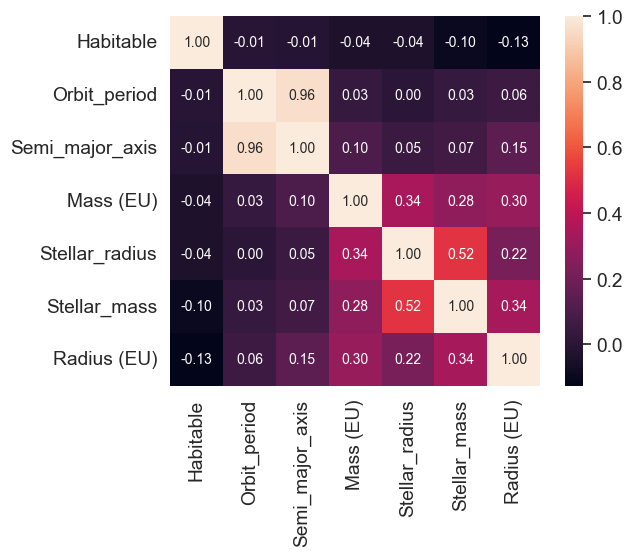

In [5]:
#Data Analysis
%matplotlib inline
#Correlation Analysis
#Habitable Correlation matrix
hm = all_data.copy()
hm = hm.drop("Planet_name", axis=1)
corrmat = hm.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Habitable')['Habitable'].index
cm = np.corrcoef(hm[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


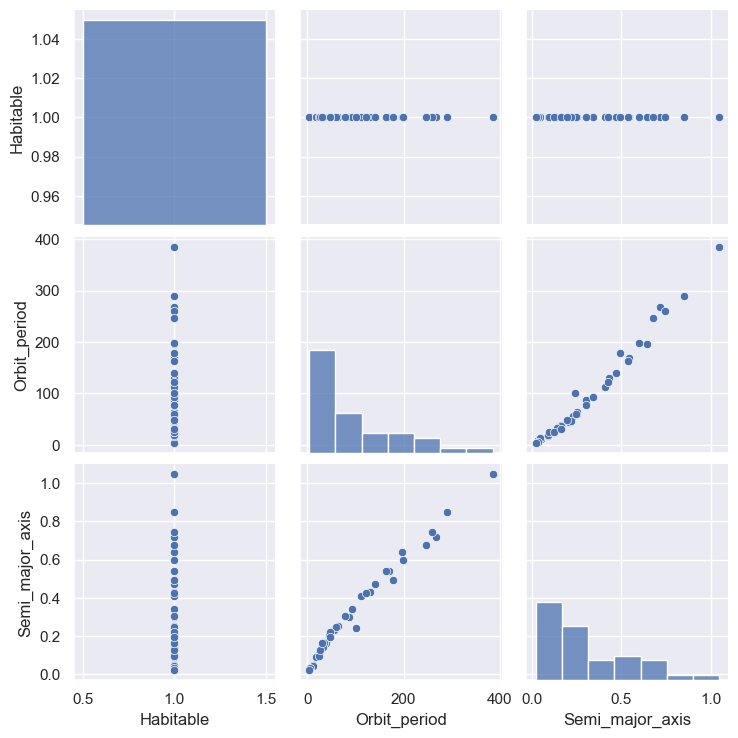

In [66]:
#Scatter-Plots for various features 

sns.set()
# cols = ['Orbit_period','Semi_major_axis','Mass (EU)','Radius (EU)','Density','Insolation_flux','Effective_temp','Stellar_luminosity','Stellar_mass','Stellar_radius','Habitable']
cols = ['Habitable','Orbit_period','Semi_major_axis']
sns.pairplot(train_set[cols], height = 2.5)
plt.show();

In [6]:
# Drop irrelevant columns
all_data=all_data.drop("Habitable",axis=1)
all_data=all_data.drop("Planet_name",axis=1)

In [7]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(all_data, labels)

features_train, features_test, labels_train, labels_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(3384, 7)
(1128, 7)
(3384,)
(1128,)


In [39]:
#Classification Logistic Regression 



from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression().fit(features_train,labels_train)
pred = lgr.predict(features_test)
predictions = lgr.predict(features_train)

d:\anaconda\Anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
#Accuracy Report
from sklearn.metrics import classification_report

print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       579
           1       0.99      1.00      0.99       549

    accuracy                           0.99      1128
   macro avg       0.99      0.99      0.99      1128
weighted avg       0.99      0.99      0.99      1128

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3384
   macro avg       1.00      1.00      1.00      3384
weighted avg       1.00      1.00      1.00      3384



In [41]:
#Classification by Support Vector MAchine (SVM)

from sklearn.svm import SVC

svc = SVC().fit(features_train,labels_train)

pred = svc.predict(features_test)

predictions = svc.predict(features_train)


In [42]:
#Accuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       272
           1       0.83      0.96      0.89       261

    accuracy                           0.89       533
   macro avg       0.89      0.89      0.89       533
weighted avg       0.90      0.89      0.89       533

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       794
           1       0.83      0.95      0.89       805

    accuracy                           0.88      1599
   macro avg       0.89      0.88      0.88      1599
weighted avg       0.89      0.88      0.88      1599



In [9]:
#Classification by RandomForest

from sklearn.ensemble import RandomForestClassifier
import joblib

rfr = RandomForestClassifier().fit(features_train,labels_train)

pred = rfr.predict(features_test)

predictions = rfr.predict(features_train)

joblib.dump(rfr, 'rf_model.pkl')



['rf_model.pkl']

In [12]:
#Acuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       579
           1       0.99      1.00      0.99       549

    accuracy                           0.99      1128
   macro avg       0.99      0.99      0.99      1128
weighted avg       0.99      0.99      0.99      1128

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3384
   macro avg       1.00      1.00      1.00      3384
weighted avg       1.00      1.00      1.00      3384



In [45]:
#Classification by Naive Bayes

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB().fit(features_train,labels_train)

pred = nbc.predict(features_test)

predictions = nbc.predict(features_train)

In [46]:
#Acuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       272
           1       0.95      0.99      0.97       261

    accuracy                           0.97       533
   macro avg       0.97      0.97      0.97       533
weighted avg       0.97      0.97      0.97       533

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       794
           1       0.96      0.99      0.98       805

    accuracy                           0.98      1599
   macro avg       0.98      0.98      0.98      1599
weighted avg       0.98      0.98      0.98      1599

